In [1]:
!pip3 install image

import ResultsInspectors.ga_inspector as gai
import ResultsInspectors.bo_inspector as boi
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import image

from IPython import display
import pylab as pl
import numpy as np
import pandas as pd
import os

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind_from_stats
from statistics import mean
from statistics import stdev
import ast
from collections import defaultdict

accuracies = dict()
testbed = 'Testbed1/'
results_directory = 'Final Results (Random Initial State)/' + testbed


In [2]:
def GA_Plotter(directory_name, linestyle, color, plotDataPoints):
    maxs = []
    D = [0]*1000
    average_sens = 0
    results = gai.read_files(results_directory + directory_name)
    accuracies[directory_name] = []
    
    for run in results:
        run = run[0]

        data = []
        sensor_num = []
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        average_sens = average_sens + int(sensor_num[data.index(max(data))])                
        accuracies[directory_name].append(max(data))

        data = list(data)
        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        
        maxs.append(max(data))

        D = [d1 + d2 for d1, d2 in zip(D,data)]

    D = [d / len(results) for d in D]
    gai.plot_convergence(D, 
                         plotDataPoints = False, 
                         color = color, 
                         ls = linestyle, 
                         xlabel="Black-box function query #",
                         ylabel='$F^1$'
                         + '\nnumber of motion sensors placed: ' + str(average_sens / 5))
    
    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))

    
def GA_Plotter_single(directory_name, linestyle, color, plotDataPoints):
    results = gai.read_files(results_directory + directory_name)
    average_sens = 0
    maxs = []
    
    for run in results:
        run = run[0]
        data = []
        sensor_num = []
        
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        maxs.append(data)
                
        # average_sens = average_sens + int(sensor_num[data.index(max(data))])  
        
    run = results[maxs.index(max(maxs))]
    run = run[0]
    
    data = []
    sensor_num = []

    for generation in run:
        for chromosome in generation:
            data.append(chromosome[0])
    
    
    gai.plot_convergence(data, 
                         plotDataPoints = plotDataPoints, 
                         color = color, 
                         ls = linestyle, 
                         xlabel="Black-box function query #",
                         ylabel='$F^1$')
                         # name = '\nnumber of motion sensors placed: ' + str(average_sens / 5))
            
    print(average_sens / 5)
    return data

Data not available for  G (5-0.5)
Data not available for  G (7-0.5)
Data not available for  G (9-0.5)
Data not available for  G (11-0.5)
Data not available for  G (13-0.5)
Data not available for  G (15-0.5)
	G (5-1)performance: 56.75740899411251 $\pm$ 4.798137094366119
	G (7-1)performance: 66.71234941948128 $\pm$ 3.9502440436883157
	G (9-1)performance: 57.366143273668634 $\pm$ 3.1045323923966843
	G (11-1)performance: 70.95030353553479 $\pm$ 1.8156854534688687
	G (13-1)performance: 72.78935299788114 $\pm$ 1.4884043995219507
	G (15-1)performance: 66.83440203034937 $\pm$ 5.39060220742796
	G (5-2)performance: 51.915376238959674 $\pm$ 1.750508353486429
	G (7-2)performance: 69.74006955551981 $\pm$ 1.4732627483089593
	G (9-2)performance: 59.30816342250428 $\pm$ 1.7073657401294664
	G (11-2)performance: 60.72403438821035 $\pm$ 2.000757332156522
	G (13-2)performance: 65.91883727030697 $\pm$ 2.7428486107524273
	G (15-2)performance: 70.96457548794079 $\pm$ 1.3646807276874195


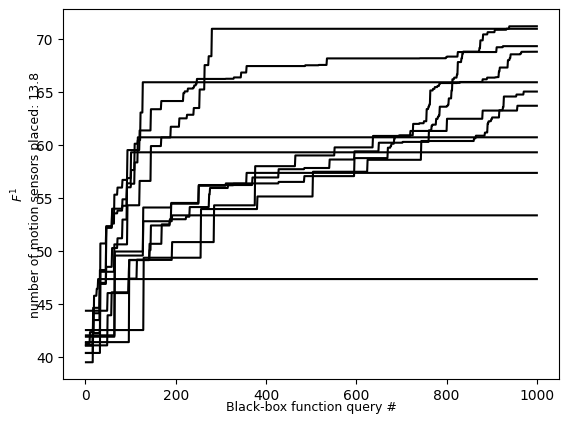

In [3]:
for e in [0.5, 1, 2]:
    for s in [5, 7, 9, 11, 13, 15]:
        dn1 = 'G (' + str(s) + '-' + str(e) + ')'
        try:
        
            GA_Plotter(dn1, linestyle = '-', color = 'k', plotDataPoints = True)
            # plt.show()
            
        except:
            print('Data not available for ', dn1)

	GA (0.25)performance: 56.78470462499016 $\pm$ 1.0321128477426669
	GA (0.25)performance: 56.78470462499016 $\pm$ 1.0321128477426669
	GA (0.25)performance: 56.78470462499016 $\pm$ 1.0321128477426669
	GA (0.25)performance: 56.78470462499016 $\pm$ 1.0321128477426669
	GA (0.25)performance: 56.78470462499016 $\pm$ 1.0321128477426669
	GA (0.25)performance: 56.78470462499016 $\pm$ 1.0321128477426669
	GA (0.5)performance: 59.7206729767373 $\pm$ 0.4316534754756733
	GA (0.5)performance: 59.7206729767373 $\pm$ 0.4316534754756733
	GA (0.5)performance: 59.7206729767373 $\pm$ 0.4316534754756733
	GA (0.5)performance: 59.7206729767373 $\pm$ 0.4316534754756733
	GA (0.5)performance: 59.7206729767373 $\pm$ 0.4316534754756733
	GA (0.5)performance: 59.7206729767373 $\pm$ 0.4316534754756733
	GA (1)performance: 54.544862409712735 $\pm$ 1.032019811365162
	GA (1)performance: 54.544862409712735 $\pm$ 1.032019811365162
	GA (1)performance: 54.544862409712735 $\pm$ 1.032019811365162
	GA (1)performance: 54.54486240

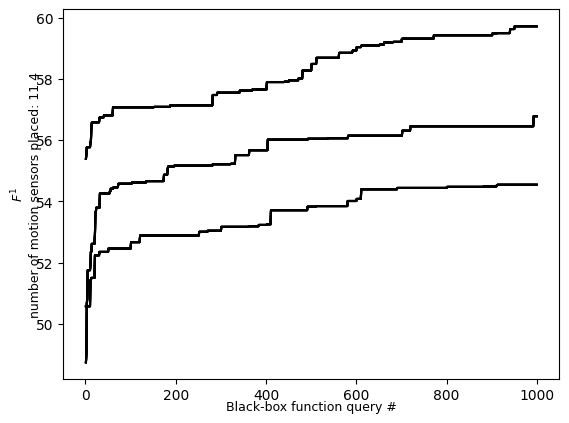

In [4]:
for e in [0.25, 0.5, 1]:
    for s in [5, 7, 9, 11, 13, 15]:
        dn1 = 'GA (' + str(e) + ')'
        try:
        
            GA_Plotter(dn1, linestyle = '-', color = 'k', plotDataPoints = True)
            # plt.show()
            
        except:
            print('Data not available for ', dn1)

In [5]:
def BO_Plotter(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints):
    maxs = []
    test = []
    D = [0]*1000
    if directory_name == 'BO (15-0.25)' and testbed == 'Testbed2/':
        D = [52.50192801569383, 56.3247894546642, 56.3247894546642, 56.37489186513843, 56.87151479132067, 56.87151479132067, 56.87151479132067, 57.24577445349362, 58.02817791707353, 58.02817791707353, 58.02817791707353, 58.02817791707353, 58.250995342010754, 58.250995342010754, 58.874778605657546, 58.874778605657546, 60.01424433008465, 60.01424433008465, 60.01424433008465, 60.028365597079734, 60.028365597079734, 60.028365597079734, 60.0791724382445, 61.088558700060084, 61.088558700060084, 62.27921281686126, 62.27921281686126, 62.27921281686126, 62.27921281686126, 62.27921281686126, 62.27921281686126, 62.27921281686126, 62.27921281686126, 62.27921281686126, 62.27921281686126, 62.27921281686126, 62.27921281686126, 62.506588196695134, 62.506588196695134, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.75831557972401, 62.9684348279355, 62.9841992598319, 62.9841992598319, 62.9841992598319, 62.9841992598319, 63.07065808604641, 63.07065808604641, 63.07065808604641, 63.07065808604641, 63.07065808604641, 63.07065808604641, 63.07065808604641, 63.07065808604641, 63.07065808604641, 63.07065808604641, 63.2936111574096, 63.2936111574096, 63.2936111574096, 63.2936111574096, 63.2936111574096, 63.66483425724969, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 63.77462053957281, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.24093084210077, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.33360307649012, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.37812204321651, 64.58473982974768, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 65.54210209739713, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.165920453101, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54684788900417, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.54969743414986, 66.59504955144459, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 66.85244710363058, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.3899612833646, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.4304687495605, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.55089884293662, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.62291950672784, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.74083288749469, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.77374658976866, 67.95326893959206, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.41080775354806, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162, 68.47152465561162]
    
    elif directory_name == 'BO (15-0.25)' and testbed == 'Testbed1/':
        D = [53.862895202366715, 57.029962395221204, 60.84943717856335, 60.84943717856335, 61.359431807795566, 61.359431807795566, 61.359431807795566, 61.951447552415196, 62.082232311585116, 62.082232311585116, 62.082232311585116, 62.082232311585116, 62.082232311585116, 62.082232311585116, 62.082232311585116, 62.082232311585116, 62.082232311585116, 62.082232311585116, 62.56431459545761, 63.71557890963099, 63.72478210801411, 64.8181990938501, 65.27410986012988, 65.27410986012988, 65.27410986012988, 65.45849664282561, 66.23195985503231, 67.62741997092313, 67.62741997092313, 67.62741997092313, 67.62741997092313, 67.62741997092313, 68.27664646781754, 68.27664646781754, 68.27664646781754, 68.27664646781754, 68.27664646781754, 68.27664646781754, 68.27664646781754, 68.27664646781754, 68.27664646781754, 68.27664646781754, 68.27664646781754, 68.27664646781754, 68.27664646781754, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.48771402955205, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 68.66780023764616, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.55286544514775, 69.80301173123955, 69.81245993054422, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.35606591021208, 70.36256417107299, 70.36256417107299, 70.36256417107299, 70.36256417107299, 70.36256417107299, 70.36256417107299, 70.36256417107299, 70.36256417107299, 70.36256417107299, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.44571386105106, 70.78285762937605, 70.78285762937605, 70.78285762937605, 70.78285762937605, 70.78285762937605, 70.78285762937605, 70.78285762937605, 70.8169801417396, 70.8169801417396, 70.8169801417396, 70.83323120725228, 70.83323120725228, 70.83323120725228, 70.83323120725228, 70.92734141972002, 70.92734141972002, 70.92734141972002, 70.92734141972002, 70.92734141972002, 71.0476498992185, 71.0476498992185, 71.0476498992185, 71.0476498992185, 71.0476498992185, 71.0476498992185, 71.0476498992185, 71.0476498992185, 71.0476498992185, 71.0476498992185, 71.0476498992185, 71.0476498992185, 71.0476498992185, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.65711568711433, 71.80948903970634, 71.80948903970634, 71.80948903970634, 71.80948903970634, 71.80948903970634, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.15677584046686, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16389847514957, 72.16842188911409, 72.16842188911409, 72.16842188911409, 72.16842188911409, 72.16842188911409, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 72.24319674932198, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.06797336663143, 73.21007049103608, 73.21007049103608, 73.21007049103608, 73.21007049103608, 73.21007049103608, 73.21007049103608, 73.21007049103608, 73.21007049103608, 73.21007049103608, 73.21007049103608, 73.21007049103608, 73.21007049103608, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.53927675543144, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.55866198291776, 73.69884104845184, 73.69884104845184, 73.69884104845184, 73.69884104845184, 73.69884104845184, 73.69884104845184, 73.69884104845184, 73.69884104845184, 73.69884104845184, 73.69884104845184, 73.69884104845184, 73.69884104845184, 73.69884104845184, 73.69884104845184, 73.69884104845184, 73.76522227240118, 73.76522227240118, 73.76522227240118, 73.76522227240118, 73.76522227240118, 73.76522227240118, 73.76522227240118, 73.76522227240118, 73.76522227240118, 73.76522227240118, 73.76522227240118, 73.76522227240118, 73.76522227240118, 73.76522227240118, 73.76522227240118, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 73.99698068670075, 74.65182187829807, 74.65182187829807, 74.65182187829807, 74.65182187829807, 74.65182187829807, 74.65182187829807, 74.65182187829807, 74.65182187829807, 74.65569358127814, 74.65569358127814, 74.65569358127814, 74.65569358127814, 74.65569358127814, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 74.6947629340074, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.20061610053236, 75.25671124009588, 75.25671124009588, 75.25671124009588, 75.25671124009588, 75.25671124009588, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.72594964024529, 75.82987123669514, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.01801194880026, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.13718651436693, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414, 76.1504579839414]
    
    else:
        results = boi.read_files(results_directory + directory_name)
        

    accuracies[directory_name] = []
    
    if directory_name == 'BO (15-0.25)':
            D = D

    else:
        for index, result in enumerate(results):
            
            data = [100 - p for p in result.perfs]
            accuracies[directory_name].append(max(data))
            maxs.append(max(data))
            data = list(data)
            n_calls = len(data)
            iterations = range(1, n_calls + 1)
            data = [np.max(data[:i]) for i in iterations]
            D = [d1 + d2 for d1, d2 in zip(D,data)]
        
            if not holdplot:
                plt.show()
            
        D = [d / len(results) for d in D]
        
    ax1 = boi.plot_convergence(D, 
                               plotDataPoints = False, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$'
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )

    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))
    
    return ax1, sum(maxs) / 5
    
    
def BO_Plotter_best(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints):
    results = boi.read_files(results_directory + directory_name)
    # accuracies[directory_name] = []
    maxs = []
    
    for index, result in enumerate(results):
        data = [100 - p for p in result.perfs]
        maxs.append(max(data))

    best_result = results[maxs.index(max(maxs))]
    data = [100 - p for p in best_result.perfs]


    ax1 = boi.plot_convergence(data, 
                               plotDataPoints = plotDataPoints, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$'
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )


    if not holdplot:
        plt.show()

    return data
    # return ax1, ax2, sum(maxs) / 5

In [6]:
def Greedy_Plotter(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints, data_range):
    maxs = []
    # test = []
    D = [0]*1000
    # results = boi.read_files(results_directory + directory_name)
    
    average_sens = 0
    results = gai.read_files(results_directory + directory_name)
    
    accuracies[directory_name] = []
    
    for run in results:
        run = run[0]

        data = []
        sensor_num = []
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        average_sens = average_sens + int(sensor_num[data.index(max(data))])                
        # accuracies[directory_name].append(max(data))

        data = list(data)
        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        


        maxs.append(max(data[0:data_range]))
        accuracies[directory_name].append(max(data[0:data_range]))

        D = [d1 + d2 for d1, d2 in zip(D,data)]

    '''
    for index, result in enumerate(results):
        data = [100 - p for p in result.perfs]
        # data.sort()
        
        # data[0] = data[1]
        accuracies[directory_name].append(max(data))
        maxs.append(max(data))

        # D = [d1 + d2 for d1, d2 in zip(D,data)]
        # D = [max(d1, d2) for d1, d2 in zip(D,data)]
        
        data = list(data)

        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        
        D = [d1 + d2 for d1, d2 in zip(D,data)]
        
        
        # ax1 = boi.plot_convergence(data, plotDataPoints = False, name = name + ' : ' + 'Best Performance Found: ' + "{:.2f}".format(max(data)))
        
        if not holdplot:
            plt.show()
    '''

    D = [d / len(results) for d in D]
    D = D[0:data_range]
    

    
    
    if len(D) < 1000:
        for i in range(data_range, 1000):
            D.append(D[data_range-1])
        
    

    ax1 = gai.plot_convergence(D, 
                               plotDataPoints = False, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$'
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )

    # print(maxs)
    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))
    
    return ax1, sum(maxs) / len(results)
    
    
def Greedy_Plotter_single(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints, data_range):
    results = gai.read_files(results_directory + directory_name)
    average_sens = 0
    maxs = []
    
    for run in results:
        run = run[0]
        data = []
        sensor_num = []
        

        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])
                
        maxs.append(max(data[0:data_range]))  
        # average_sens = average_sens + int(sensor_num[data.index(max(data))])      
    run = results[maxs.index(max(maxs))]
    print(max(maxs))
    
    run = run[0]
    
    data = []
    sensor_num = []

    for generation in run:
        for chromosome in generation:
            data.append(chromosome[0])
        
    data = data[0:data_range]
    
    if len(data) < 1000:
        for i in range(data_range, 1000):
            data.append(data[data_range-1])
        
    gai.plot_convergence(data, 
                         plotDataPoints = plotDataPoints, 
                         color = color, 
                         ls = linestyle, 
                         xlabel="Black-box function query #",
                         ylabel='$F^1$')
                         # name = '\nnumber of motion sensors placed: ' + str(average_sens / 5))
            
    print(average_sens / len(results))

    return data

	GA (0.25)performance: 56.78470462499016 $\pm$ 1.0321128477426669
	BO (5-0.25)performance: 73.82240193351628 $\pm$ 0.8166665508584405
places: 5
1000
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed1/G (5-0.25)'
	BO (7-0.25)performance: 75.28589685008993 $\pm$ 0.9612555000770838
places: 7
1000
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed1/G (7-0.25)'
	BO (9-0.25)performance: 77.89248943417019 $\pm$ 1.563608661909037
places: 9
1000
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed1/G (9-0.25)'
	BO (11-0.25)performance: 75.02520688051236 $\pm$ 1.8501854060270617
places: 11
1000
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed1/G (11-0.25)'
	BO (13-0.25)performance: 74.80959084365513 $\pm$ 1.912628210686522
places: 13
1000
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed1/G (13-0.25)'
	BO (

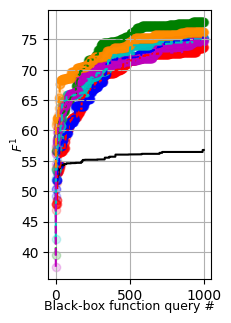

	GA (0.5)performance: 59.7206729767373 $\pm$ 0.4316534754756733
	BO (5-0.5)performance: 72.4758168336011 $\pm$ 1.0895635580188985
places: 5
1000
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed1/G (5-0.5)'
	BO (7-0.5)performance: 76.57565137645507 $\pm$ 1.9363906448037151
places: 7
1000
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed1/G (7-0.5)'
	BO (9-0.5)performance: 73.45257396655435 $\pm$ 1.6152255725871585
places: 9
1000
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed1/G (9-0.5)'
	BO (11-0.5)performance: 74.17916578566698 $\pm$ 1.5998994097247563
places: 11
1000
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed1/G (11-0.5)'
	BO (13-0.5)performance: 75.22100019449935 $\pm$ 0.9434954409359625
places: 13
1000
----- [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed1/G (13-0.5)'
	BO (15-0.5)perf

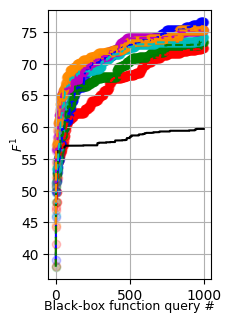

	GA (1)performance: 54.544862409712735 $\pm$ 1.032019811365162
	BO (5-1)performance: 68.48702164207734 $\pm$ 4.420616144068898
places: 5
230
	G (5-1)performance: 53.35906367906226 $\pm$ 6.953903637353597
	BO (7-1)performance: 72.88518321376532 $\pm$ 1.2770574782293624
places: 7
315
	G (7-1)performance: 53.95295908914223 $\pm$ 0.9249193584750901
	BO (9-1)performance: 75.3058874435803 $\pm$ 1.180031346371763
places: 9
396
	G (9-1)performance: 57.366143273668634 $\pm$ 3.1045323923966843
	BO (11-1)performance: 71.32834308198845 $\pm$ 1.3434930525483455
places: 11
473
	G (11-1)performance: 56.51535451203354 $\pm$ 0.8612995531002348
	BO (13-1)performance: 73.21440091082867 $\pm$ 1.9649248742284853
places: 13
546
	G (13-1)performance: 58.62733181487581 $\pm$ 2.8073284327869032
	BO (15-1)performance: 70.70477267066354 $\pm$ 0.9564712333335887
places: 15
615
	G (15-1)performance: 59.77282125420626 $\pm$ 3.024138053739262


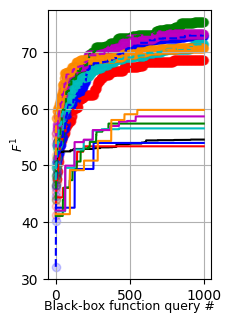

In [7]:
def calculate_datarange(e, gsn):
    if testbed == 'Testbed1/':
        placeHolders = []
        Xs = frange(e, 8, e)
        Ys = frange(e, 8, e)

        for x in Xs:
            for y in Ys:
                placeHolders.append([x, y])

    elif testbed == 'Testbed2/':
        placeHolders = []
        Xs = frange(e, 8, e)
        Ys = frange(e, 5.3, e)

        for x in Xs:
            for y in Ys:
                if x < 2 and y < 2:
                    continue
                else:
                    placeHolders.append([x, y])

    S = len(placeHolders)
    
    if gsn != -1:
        placed_sn = min(S, gsn)
    else:
        placed_sn = S
    print('places:', placed_sn)   
    dr = int((S * placed_sn) - ((placed_sn * (placed_sn + 1)) / 2))
    dr = min(dr, 1000)

    
    print(dr)
    return dr 


def frange(start, stop, step):
        steps = []
        while start < stop:
            steps.append(start)
            start +=step
        
        return steps

sensorNums = [5, 7, 9, 11, 13, 15]
epsilons = [0.25, 0.5, 1]

styles = [['', '--'],
           ['', ':'],
           ['', '-.'],
           ['o', '--'], 
           ['o', ':'],
           ['o', '-.']]
        
colors = ['r', 'b', 'g', 'c', 'm', 'darkorange']

for e in epsilons:
    index = 0
    BOnames = ['GA']
    fig, ax = plt.subplots(figsize=(2.1, 3.5))
    dn1 = 'GA (' + str(e) + ')'
    GA_Plotter(dn1, 
               linestyle = '-', 
               color = 'k',
               plotDataPoints = True)
    
    for index, sn in enumerate(sensorNums):
        dn2 = 'BO (' + str(sn) + '-' + str(e) + ')'
        dn3 = 'G (' + str(sn) + '-' + str(e) + ')'
        try:
            BO_Plotter(dn2, 
                        holdplot = True, 
                        plotDataPoints = True,
                        name = dn2, 
                        e = e,
                        linestyle = styles[0][1], 
                        marker = styles[0][0],
                        color = colors[index])

            BOnames.append('BO ' + str(sn))
        except Exception as err:
            print('----- ', err)
        
        try:
            dr = calculate_datarange(e, sn)
            
            Greedy_Plotter(dn3,
                        holdplot = True, 
                        plotDataPoints = True,
                        name = dn2, 
                        e = e,
                        linestyle = styles[0][1], 
                        marker = styles[0][0],
                        color = colors[index],
                        data_range = dr)

            BOnames.append('Greedy ' + str(sn))

        except Exception as err:
            print('-----',  err)

        

        # plt.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

        # legend = plt.legend(BOnames, ncol=13, prop={'size': 9}, loc = 'center left', handlelength = 1.5, bbox_to_anchor=(1, 0.5))
        
        # legend.get_frame().set_alpha(None)
        # legend.get_frame().set_facecolor((0, 0, 0, 0.1))
    
    # plt.grid()
    plt.show()

G (5-0.25)
Data not available for  G (5-0.25)
G (7-0.25)
Data not available for  G (7-0.25)
G (9-0.25)
Data not available for  G (9-0.25)
G (11-0.25)
Data not available for  G (11-0.25)
G (13-0.25)
Data not available for  G (13-0.25)
G (15-0.25)
Data not available for  G (15-0.25)
G (5-0.5)
Data not available for  G (5-0.5)
G (7-0.5)
Data not available for  G (7-0.5)
G (9-0.5)
Data not available for  G (9-0.5)
G (11-0.5)
Data not available for  G (11-0.5)
G (13-0.5)
Data not available for  G (13-0.5)
G (15-0.5)
Data not available for  G (15-0.5)
G (5-1)
66.94075951623421
0.0


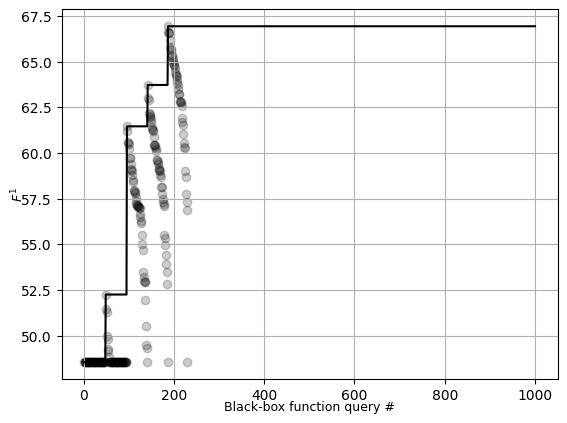

G (7-1)
69.1946668310346
0.0


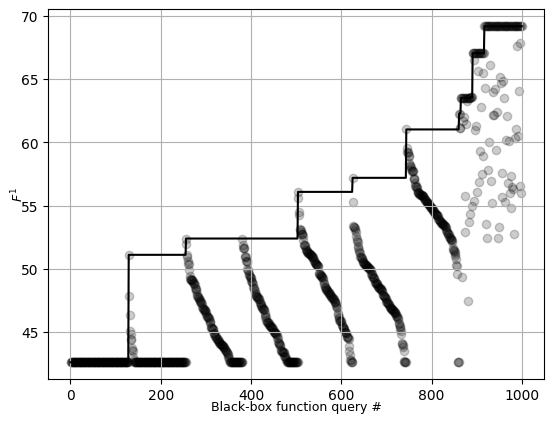

G (9-1)
61.60526448631607
0.0


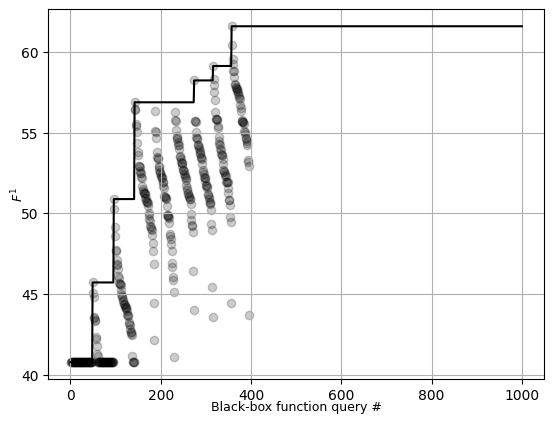

G (11-1)
72.66602419541545
0.0


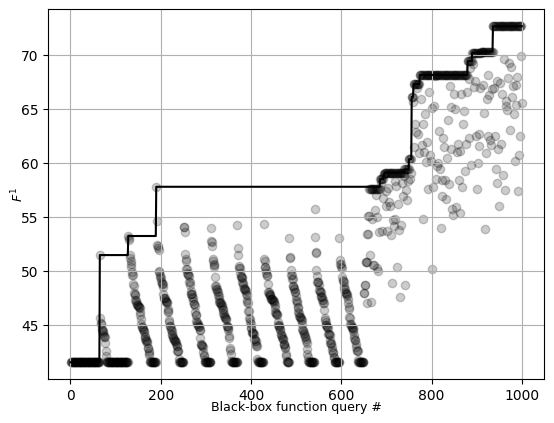

G (13-1)
73.9712700365088
0.0


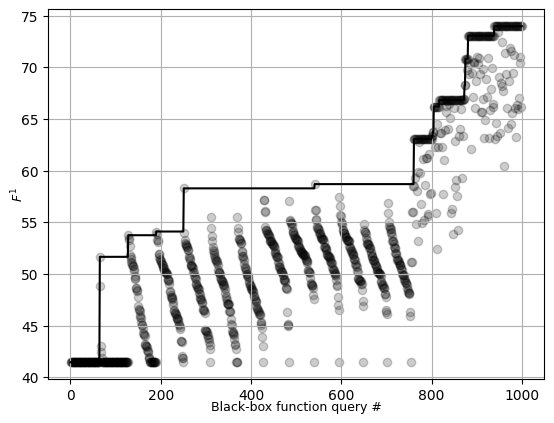

G (15-1)
71.7280060052313
0.0


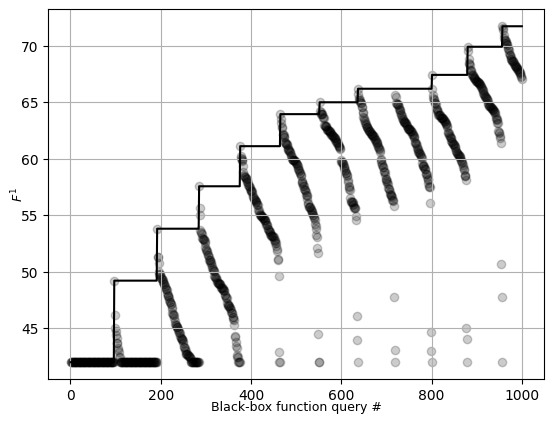

In [8]:
for e in [0.25, 0.5, 1]:
    for s in [5, 7, 9, 11, 13, 15]:

        dn1 = 'G (' + str(s) + '-' + str(e) + ')'

        try:
            print(dn1)
            Greedy_Plotter_single(dn1, 
                                  holdplot = False, 
                                  name = 'test', 
                                  e = e, 
                                  linestyle = '-', 
                                  color = 'k', 
                                  marker = '',
                                  plotDataPoints = True, 
                                  data_range = 1000)
            plt.show()
            
        except:
            print('Data not available for ', dn1)

0.0
GA is less than 77.9 of the BOs observations.


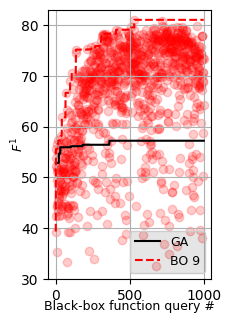

0.0
GA is less than 79.4 of the BOs observations.


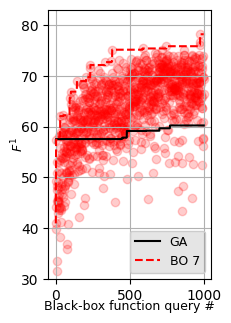

0.0
places: 15
615
64.99428116586378
0.0
GA is less than 81.8 of the BOs observations.
Greedy is less than 62.5 of the BOs observations.


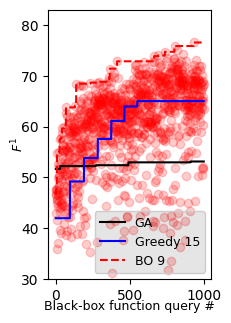

In [9]:
def calculate_moving_percentile(bo, baseline):
    counter = 0

    for index in range(len(bo)):
        if index == 0:
            if bo[index] > np.max(baseline[index]):
                counter += 1
            
        else:
            if bo[index] > np.max(baseline[0:index]):
                counter += 1

    
    return 100 * (counter / len(bo))


sensorNums = [5, 7, 9, 11, 13, 15]
epsilons = [0.25, 0.5, 1]

styles = [['', '--'],
           ['', ':'],
           ['', '-.'],
           ['o', '--'], 
           ['o', ':'],
           ['o', '-.']]
        
colors = ['r', 'b', 'g', 'c', 'm', 'darkorange']

for e in epsilons:
    if testbed == 'Testbed1/':
        if e == 0.25: 
            sn = 9
            gsn = -1
            
        elif e == 0.5:
            sn = 7
            gsn = -1
            
        elif e == 1:
            sn = 9
            gsn = 15
    elif testbed == 'Testbed2/':
        if e == 0.25: 
            sn = 11
            gsn = -1
            
        elif e == 0.5:
            sn = 11
            gsn = 7
            
        elif e == 1:
            sn = 13
            gsn = 11

    BOnames = ['GA']
    fig, ax = plt.subplots(figsize=(2.1, 3.5))
    ax.set_ylim([30, 83])
    plt.grid()
    
    dn1 = 'GA (' + str(e) + ')'
    ga_data = GA_Plotter_single(dn1, 
               plotDataPoints = False,
               linestyle = '-', 
               color = 'k')
    
    
    dn2 = 'BO (' + str(sn) + '-' + str(e) + ')'
    
    if gsn != -1:
        dn3 = 'G (' + str(gsn) + '-' + str(e) + ')'
        
        dr = calculate_datarange(e, gsn)
        
        greedy_data = Greedy_Plotter_single(dn3, 
                holdplot = True, 
                plotDataPoints = False,
                name = dn3, 
                e = e,
                linestyle = styles[0][1], 
                marker = styles[0][0],
                color = 'b',
                data_range = dr)
    
    
    bo_data = BO_Plotter_best(dn2, 
            holdplot = True, 
            plotDataPoints = True,
            name = dn2, 
            e = e,
            linestyle = styles[0][1], 
            marker = styles[0][0],
            color = 'r')

    BOnames.append('BO ' + str(sn))

    from scipy import stats 

    
    print('GA is less than {} of the BOs observations.'.format(calculate_moving_percentile(bo_data, ga_data)))

    if gsn != -1:
        print('Greedy is less than {} of the BOs observations.'.format(calculate_moving_percentile(bo_data, greedy_data)))
        
    
        

    if gsn == -1:
        legend = plt.legend(['GA', 'BO ' + str(sn)],ncol=1, prop={'size': 9}, loc = 'lower right')
    else:
        legend = plt.legend(['GA', 'Greedy ' + str(gsn), 'BO ' + str(sn)],ncol=1, prop={'size': 9}, loc = 'lower right')
    
    legend.get_frame().set_alpha(None)
    
    
    legend.get_frame().set_facecolor((0, 0, 0, 0.1))
    
    plt.grid()

    plt.show()
        



# Sensor Locations Animation

In [10]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    
    def f(x):
        return np.clip(x**2,-1,1)
        # return x**2
    
    #mycmap._lut[:,-1] = np.linspace(0.7, 1, N+4)
    # mycmap._lut[:,-1] = np.logspace(0.0, 10, N+4, endpoint=False, base = np.e)

    
    mycmap._lut[:,-1] = np.linspace(0, 1, N + 4, endpoint=False)
    
    # mycmap._lut[:,-1] = np.linalg.norm(mycmap._lut[:,-1])
    # print(type(mycmap._lut[:,-1]))
    return mycmap


def HeatMap(data_x, data_y):
    mycmap = transparent_cmap(plt.cm.autumn)    
    heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=100)
    extent = [0.2, 7.7, 0.6, 7.8]
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
    # heatmap = heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=[np.arange(0,400,5),np.arange(0,300,5)])
    # extent = [0.3, 8.2, 0.3, 8.2]
    # plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
def HM(x1, x2):
  mycmap = transparent_cmap(plt.cm.autumn) 
  if testbed == 'Testbed1/':
    extent = [0.0, 8.0, 0.4, 8.0]

  elif testbed == 'Testbed2/':
    extent = [0.0, 5.2, 0.4, 8.0]

  from scipy.stats import gaussian_kde
  # plt.figure(figsize=(8, 10))

  # fit an array of size [Ndim, Nsamples]
  data = np.vstack([x1, x2])
  kde = gaussian_kde(data)

  # evaluate on a regular grid
  xgrid = np.linspace(min(x1), max(x1), 50);
  ygrid = np.linspace(min(x2), max(x2), 50);
  Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
  Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

  # Plot the result as an image
  plt.imshow(Z.reshape(Xgrid.shape),
            origin='lower', aspect='auto',
            extent=extent,
            cmap = mycmap)
  # cb = plt.colorbar()
  # cb.set_label("Occupants presence probability")

def get_sensor_locations(c, epsilon):
    import ast

    # THIS IS FOR (X, Y) CONFIGURATION SPACES
    coordinates = c.get_dictionary()
    
    Xs = []
    Ys = []
    Ts = []

    
    '''
    for i in range(1, int(len(coordinates.keys())/2) + 1):
        Xs.append(coordinates['x'+str(i)] * epsilon)
        Ys.append(coordinates['y'+str(i)] * epsilon)
    
    '''
    for key in coordinates.keys():
        # print(coordinates[key])
        try:
            loc = ast.literal_eval(coordinates[key])
            Xs.append(loc[0])
            Ys.append(loc[1])

            #TODO: Handle different sensor types here:
            Ts.append(1)
            
        except:
            continue
    
    # Xs.append(Xs[0])
    # Ys.append(Ys[0])


    for k in range(len(Xs)):
        for i in range(len(Xs)):
            for j in range(i+1, len(Xs)):
                if Xs[i] == Xs[j] and Ys[i] == Ys[j]:
                    Xs[i] -= 0.2
                    # print(Xs[i])

    for k in range(len(Xs)):
        for i in range(len(Xs)):
            for j in range(i+1, len(Xs)):
                if Xs[i] == Xs[j] and Ys[i] == Ys[j]:
                    Xs[i] -= 0.2
                    # print(Xs[i])
                        

    print(Xs)
    print(Ys)
    return Xs, Ys, Ts

    # THIS IS FOR X, Y, T_O CONFIGURATION SPACES
    '''
    # print(c)
    print(epsilon)
    coordinates = c.get_dictionary()

    Xs = []
    Ys = []
    Ts = []
    
    [str(item/255.) if item > 1 else 'r' for item in Ts]
    
    for key in coordinates.keys():
        if 'object' in key:
            Xs.append(float(coordinates[key].split(',')[0]))
            Ys.append(float(coordinates[key].split(',')[1]))
        
    for key in coordinates.keys():
        if 't_o' in key:
            Ts.append(coordinates[key])
        
    for key in coordinates.keys():
        if 'x' in key:
            Xs.append(coordinates[key])
            Ts.append(1)
        
    for key in coordinates.keys():
        if 'y' in key:
            Ys.append(coordinates[key])
    '''
    '''
        if 'x' in key:
            # print(coordinates[key])
            Xs.append(coordinates[key] / epsilon)
            
        elif 'y' in key:
            Ys.append(coordinates[key] / epsilon)

        elif 'object' in key:
            Xs.append(float(coordinates[key].split(',')[0]))
            Ys.append(float(coordinates[key].split(',')[1]))
            
        elif 't_' in key:
            Ts.append(coordinates[key])
            
    return Xs, Ys, Ts
    '''

def get_traces(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"): 
            data.append(pd.read_csv(os.path.join(directory, filename)))

        else:
            continue

    data_x = []
    data_y = []

    for df in data:
        # data_x = data_x + list(np.clip(list(df.x), 0.5, 7.5))
        # data_y = data_y + list(np.clip(list(df.y), 0.5, 7.5))
        data_x = data_x + list(df.x)
        data_y = data_y + list(df.y)
        
    # print('X is: ', data_x)
    # print('Y is: ', data_y)
    
    return data_x, data_y

In [11]:
def plot_sensor_locations(path, sensorNum, epsilon, method, filenumber):
    import SensorOptimizers.BayesianOptimization as bo
    import SensorOptimizers.GeneticAlgorithm as ga
    
    if method == 'BO':            
        results = boi.read_files(path + '/BO (' + 
                                 str(sensorNum) + 
                                 '-' + 
                                 str(epsilon) + ')')
        result = results[filenumber]
        data = [100 - p for p in result.perfs]
        title = 'BO performance: ' + str(max(data))
        
    elif method == 'G':
        results = boi.read_files(path + '/G (' + 
                                 str(sensorNum) + 
                                 '-' + 
                                 str(epsilon) + ')')
        
        best_result = -1
        best_index = -1
        result = results[filenumber]
        
        data = []
        sensor_num = []

        result_for_print = result

        for generation in result_for_print:
            for chromosome in generation:
                try:
                    data.append(chromosome[0][0])
                except:
                    pass
        # if (max(data) >= best_result):
        best_index = np.argmax(data)
        best_result = max(data)
        
        '''
        for index, result in enumerate(results):
        
            data = []
            sensor_num = []

            result_for_print = result

            for generation in result_for_print:
                for chromosome in generation:
                    try:
                        data.append(chromosome[0][0])
                    except:
                        pass
            if (max(data) > best_result):
                best_index = index
                best_result = max(data)
 
        '''
        # best_result = result
        title = 'Greedy performance: ' + str(best_result)
        
    elif method == 'GA':
        results = boi.read_files(path + '/GA (' + 
                                 str(epsilon) + 
                                 ')')
        best_result = -1
        best_index = -1
        result = results[filenumber]
        
        # for index, result in enumerate(results):
        
        data = []
        sensor_num = []

        result_for_print = result

        for generation in result_for_print:
            for chromosome in generation:
                try:
                    data.append(chromosome[0][0])
                except:
                    pass
        # if (max(data) >= best_result):
        best_index = np.argmax(data)
        best_result = max(data)

        title = 'GA performance: ' + str(best_result)
        
    configurations = []
    accuracy = []
    last = 0
    
    if method == 'BO':
        data = [100 - p for p in result.perfs]
        losses = list(data)
        n_calls = len(losses)
        maxs = [np.max(losses[:i]) for i in range(1, n_calls + 1)]

        for i in range(len(maxs)):
            if (maxs[i] != last):
                last = maxs[i]
                configurations.append(i)
                accuracy.append(maxs[i])

        configs = result.get_all_configs()
        i = -1
        config_index = configurations[-1]
        c = configs[config_index]
        
        # matrix, labels = bo.get_confusion_matrix(c)
        matrix, labels = [], []
        
        
        Xs, Ys, Ts = get_sensor_locations(c, epsilon)
        
        
    elif method == 'GA' or method == 'G':
        print(best_index)
        # result = results[best_index]
        _, configurations = result
        config = configurations[-1]
        # print(config)
        data = config.GetSensorLocations()[0]
        
        # matrix, labels = ga.get_confusion_matrix(config)
        matrix, labels = [], []
        
        A = [x for x in zip(*data)]  
        Xs, Ys = A[0], A[1]

    agent_x, agent_y = get_traces(testbed + "/Agent Trace Files ROS")
    #for i in range(len(Xs)):

    if testbed == 'Testbed1/':
        xlim=(-0.2, 8.2)
        ylim=(-0.3, 8.2)

    elif testbed == 'Testbed2/':
        xlim=(-0.2, 5.2)
        ylim=(-0.3, 8.2)

    if method == 'GA':
        plt.scatter(Xs, Ys, marker = 7, color='b')
        
    elif method == 'G':
        plt.scatter(Xs, Ys, marker = ">", color='g')

    elif method == 'BO':
        # colors = [str(item/255.) if item > 1 else 'r' for item in Ts]
        
        # plt.scatter([xx * epsilon for xx in Xs], [yy * epsilon for yy in Ys], marker = "^", color = 'r')
        plt.scatter(Xs, Ys, marker = "^", color = 'r')
        
        Cs = {3: 'b', 4: 'm', 5: 'k'}
        
        '''FOR DIFFERENT SENSOR TYPES
        for i in range(len(Xs)):
            if Ts[i] == 1:
                plt.scatter(Xs[i], Ys[i], marker = 6, color = 'r')
                
            else:
                print(Xs[i])
                print(Ys[i])
                plt.scatter(Xs[i], Ys[i], marker = "o", color = Cs[Ts[i]])
        '''    
        
        
        '''
        A = list([*zip(Xs, Ys)])
        print(type(A[0]))
        res = list(set([ele for ele in A if A.count(ele) > 1]))
        if len(res) > 0:
            for p in res:
                plt.scatter(p[1] + 0.15, p[0], marker = 6, color='r', label='_nolegend_')
        '''

    plt.xlim(*xlim)
    plt.ylim(*ylim)

    img = plt.imread(testbed + "/case study (IFC).png")
    if testbed == 'Testbed1/':
        im = plt.imshow(np.flipud(img), origin='upper', extent=[-0.2, 8.2, -0.2, 8.2])
        HM(agent_x, agent_y)
        ax.set_xlim([-0.22, 8.22])
        ax.set_ylim([-0.22, 8.22])

    if testbed == 'Testbed2/':
        im = plt.imshow(np.flipud(img), origin='upper', extent=[-0.2, 5.5, -0.2, 8.2])
        HM(agent_x, agent_y)
        ax.set_xlim([-0.22, 5.42])
        ax.set_ylim([-0.22, 8.22])
        ax.set_xticks(range(0, 6))
        ax.set_yticks(range(0, 9))
    
    plt.gca().invert_yaxis()

    # display.clear_output(wait=True)
    # display.display(pl.gcf())
    return title, matrix, labels

****************************************************************************************************
epsilon: 1
****************************************************************************************************
[]
[]
80
14
Greedy performance: 69.5019604437736 : BO performance: 73.98469515749339


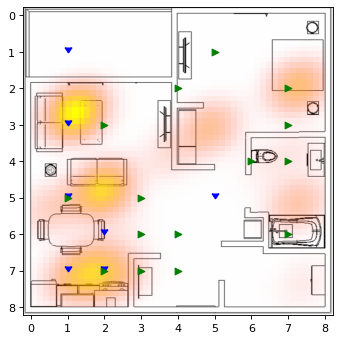

In [12]:
# from turtle import position


for epsilon in [1]:
    print('*' * 100)
    print('epsilon: ' + str(epsilon))
    print('*' * 100)

    if testbed == 'Testbed1/':
         
        if epsilon == 0.25:
            sensorNumG = -1
            sensorNum = 9
            
            filenumberGA = 0
            filenumber1G = 1
            filenumber1 = 1
            
        
        elif epsilon == 0.5:
            sensorNumG = -1
            sensorNum = 7
            
            filenumberGA = 0
            filenumber1G = 0
            filenumber1 = 1
            
        
        elif epsilon == 1:
            sensorNumG = 15
            sensorNum = 9
            
            filenumberGA = 2
            filenumber1G = 3
            filenumber1 = 0
       
        
    elif testbed == 'Testbed2/':
        
        if epsilon == 0.25:
            sensorNumG = -1
            sensorNum = 11
            
            filenumberGA = 1
            filenumber1G = 1
            filenumber1 = 2
        
        elif epsilon == 0.5:
            sensorNumG = 7
            sensorNum = 11
            
            filenumberGA = 0
            filenumber1G = 3
            filenumber1 = 4
        ####################################    
        elif epsilon == 1:
            sensorNumG = 11
            sensorNum = 13
            
            filenumberGA = 2
            filenumber1G = 3
            filenumber1 = 4
        ####################################
    import matplotlib.pyplot as plt

    if testbed == 'Testbed1/':
        fig, ax = plt.subplots(figsize=(5.0, 5.0), dpi=80)
        

    elif testbed == 'Testbed2/':
        fig, ax = plt.subplots(figsize=(3.2, 5.0), dpi=80)

    
    title, matrix, labels = plot_sensor_locations(results_directory, sensorNum, epsilon, 'BO', filenumber1)
    bo_title = title
    bo_matrix = matrix
    bo_labels = labels

    title, matrix, labels = plot_sensor_locations(results_directory, sensorNum, epsilon, 'GA', filenumberGA)
    ga_title = title
    ga_matrix = matrix
    ga_labels = labels
    
    if sensorNumG != -1:
        title, matrix, labels = plot_sensor_locations(results_directory, sensorNumG, epsilon, 'G', filenumber1G)
        ga_title = title
        ga_matrix = matrix
        ga_labels = labels
    

    # legend = plt.legend(['BO sensor locations', 'GA sensor locations', 'Greedy sensor locations'], ncol = 3, prop={'size': 9}, loc = 'center left', handlelength = 1.5, bbox_to_anchor=(1, 0.5))
    # legend.get_frame().set_alpha(None)
    # legend.get_frame().set_facecolor((0, 0, 0, 0.1))

    print(ga_title + " : " + bo_title)
    plt.show()
    

In [13]:
coordinates = {'ls1': '[2.0, 3.75]', 'ls10': '[5.25, 3.5]', 'ls11': '[0.5, 6.25]', 'ls2': '[0.25, 5.75]', 'ls3': '[5.0, 6.0]', 'ls4': '[0.25, 7.25]', 'ls5': '[2.25, 5.25]', 'ls6': '[1.25, 6.75]', 'ls7': '[5.25, 7.5]', 'ls8': '[4.5, 3.0]', 'ls9': '[4.0, 6.25]', 'ls_t1': 1, 'ls_t10': 1, 'ls_t11': 1, 'ls_t2': 1, 'ls_t3': 1, 'ls_t4': 1, 'ls_t5': 1, 'ls_t6': 1, 'ls_t7': 1, 'ls_t8': 1, 'ls_t9': 1}

In [14]:
Xs = []
Ys = []
for i in range(1, int(len(coordinates.keys())/2)):
    Xs.append(coordinates['x'+str(i)])
    Ys.append(coordinates['y'+str(i)])

KeyError: 'x1'

In [ ]:
labels = ['Undress', 
          'Take a shower', 
          'Dress', 
          'Iron', 
          'Sit and work with tablet', 
          'Exercise', 
          'Use toilet',
          'Wash hands', 
          'Watch TV', 
          'Grab ingredients from fridge',
          'Make tea', 
          'Toast breads', 
          'Grab utensils',
          'Fry eggs using stove', 
          'Eat', 
          'Take medicine',
          'Wipe dining table', 
          'Clean kitchen', 
          'Wash dishes', 
          'Grab the broom from storage',
          'Broom', 
          'Return the broom', 
          'Sleep']


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = ga_matrix[4]

# for m in range(1, len(ga_matrix)):
#     cm += ga_matrix[m]
    
    
# cm = cm/5

    
# for m in bo_matrix:    
normed_c = (cm.T / cm.astype(np.float).sum(axis=1)).T

cmn = normed_c
# cmn = cm

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cmn, cmap = plt.cm.viridis, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, linewidths=1, linecolor='grey')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=True)

# Statistics

In [ ]:


statistic = pd.DataFrame()
pvalue = pd.DataFrame()

def compare(data, minVal, maxVal = None): 
  data_compare = pd.DataFrame()

  for i1, v1 in pvalue.items():
    for i2, v2 in pvalue.items():
      if maxVal == None:
        if data.loc[i1,i2] < minVal:
          data_compare.loc[i1,i2] = 1
        else:
          data_compare.loc[i1,i2] = 0

      if maxVal != None:
        if data.loc[i1,i2] < minVal or data.loc[i1,i2] > maxVal:
          data_compare.loc[i1,i2] = 1
        else:
          data_compare.loc[i1,i2] = 0
  return data_compare


mean_std = pd.DataFrame()
for key1 in accuracies:
    for key2 in accuracies:
        
        # print(np.std(accuracies[key1]))
        # print(np.mean(accuracies[key1]))
        
        mean_std.loc[key1, 'Mean'] = np.mean(accuracies[key1])
        mean_std.loc[key1, 'STD'] = np.std(accuracies[key1])
                                             
        
        t = ttest_ind_from_stats(mean1=np.mean(accuracies[key1]), std1=np.std(accuracies[key1]), nobs1=5,
                                 mean2=np.mean(accuracies[key2]), std2=np.std(accuracies[key2]), nobs2=5)
        
        statistic.loc[key1,key2] = t.statistic
        pvalue.loc[key1,key2] = t.pvalue
        

In [ ]:
accuracies

In [ ]:
pvalue

In [ ]:
import seaborn as sns

compare_pvalue = compare(pvalue, 0.05)

for epsilon in ['0.5', '1', '2']:
    sn = '1'

    rows = ['GA (' + epsilon + ')',
            'BO (5' '-' + epsilon + ')',
            'BO (7' + '-' + epsilon + ')',
            'BO (9' + '-' + epsilon + ')',
            'BO (11' + '-' + epsilon + ')',
            'BO (13' + '-' + epsilon + ')',
            'BO (15' + '-' + epsilon + ')',
           ]

    df = compare_pvalue.filter(like=epsilon + ')').loc[rows]
    sns.heatmap(df, annot=True, cmap="binary")
    plt.show()

In [ ]:
sns.heatmap(df, annot=True, cmap="binary")

In [ ]:
sns.heatmap(df2, annot=True, cmap="binary")

In [ ]:
compare_pvalue

In [ ]:
BO05 = [72.4, 76.5, 73.4, 74.1, 75.2, 75.3]
BO1 = [68.4, 72.8, 75.3, 71.3, 73.2, 70.7]
BO2 = [58.6, 55.4, 55.5, 54.7, 56.8, 57.3]

print(np.mean(BO05))
print(np.std(BO05))
print('---')
print(np.mean(BO1))
print(np.std(BO1))
print('---')
print(np.mean(BO2))
print(np.std(BO2))

ttest_ind_from_stats(mean1=np.mean(BO05), std1=np.std(BO05), nobs1=5,
                     mean2=np.mean(BO1),  std2=np.std(BO1), nobs2=5)

In [ ]:
ttest_ind_from_stats(mean1=np.mean(BO05), std1=np.std(BO05), nobs1=5,
                     mean2=np.mean(BO2),  std2=np.std(BO2), nobs2=5)

In [ ]:
ttest_ind_from_stats(mean1=np.mean(BO1), std1=np.std(BO1), nobs1=5,
                     mean2=np.mean(BO2),  std2=np.std(BO2), nobs2=5)